In [3]:
!pip install tensorflow

In [4]:
import tensorflow as tf
import numpy as np

In [5]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [6]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [7]:
import cv2

In [8]:
from tensorflow.keras.preprocessing.image import img_to_array

In [9]:
def process_image(images):
    resized=[]
    for img in images:
        img_rgb=cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        resized.append(img_to_array(cv2.resize(img_rgb,(75,75))))
    return np.array(resized)

In [10]:
x_train=process_image(x_train)
x_test=process_image(x_test)

In [11]:
y_train=to_categorical(y_train, num_classes=10)
y_test=to_categorical(y_test, num_classes=10)

In [12]:
x_train=x_train.astype('float32') / 255.0
x_test=x_test.astype('float32') / 255.0

In [13]:
base_model=InceptionV3(weights='imagenet',include_top=False,input_shape=(75,75,3))

In [14]:
x=base_model.output
x=Flatten()(x)
x=Dense(256, activation='relu')(x)
predictions=Dense(10, activation='softmax')(x)

In [15]:
model=Model(inputs=base_model.input,outputs=predictions)

In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 75, 75, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 37, 37, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 37, 37, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 37, 37, 32)           0         ['batch_normalization[0][0

In [18]:
model.fit(x_train,y_train,batch_size=32,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20


1875/1875 [==============================] - 544s 281ms/step - loss: 0.2287 - accuracy: 0.9436 - val_loss: 0.0583 - val_accuracy: 0.9828
Epoch 2/20
1875/1875 [==============================] - 531s 283ms/step - loss: 0.0926 - accuracy: 0.9766 - val_loss: 0.4089 - val_accuracy: 0.9629
Epoch 3/20
1875/1875 [==============================] - 531s 283ms/step - loss: 0.1264 - accuracy: 0.9668 - val_loss: 0.0463 - val_accuracy: 0.9858
Epoch 4/20
1875/1875 [==============================] - 563s 300ms/step - loss: 0.0573 - accuracy: 0.9839 - val_loss: 0.0274 - val_accuracy: 0.9915
Epoch 5/20
1875/1875 [==============================] - 550s 293ms/step - loss: 0.0534 - accuracy: 0.9857 - val_loss: 1.6911 - val_accuracy: 0.9396
Epoch 6/20
1875/1875 [==============================] - 538s 287ms/step - loss: 0.0484 - accuracy: 0.9875 - val_loss: 0.0341 - val_accuracy: 0.9901
Epoch 7/20
1875/1875 [==============================] - 634s 338ms/step - loss: 0.0673 - accuracy: 0.9854 - va

In [20]:
predictions = model.predict(x_test)

313/313 [==============================] - 16s 46ms/step


In [21]:
predicted=np.argmax(predictions, axis=1)

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

TestCase 0


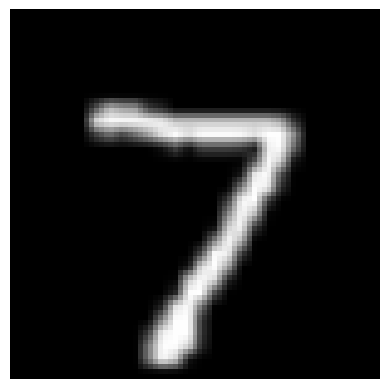

Predicted: 7 Actual: 7




TestCase 1


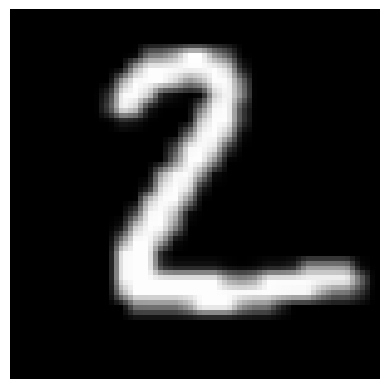

Predicted: 2 Actual: 2




TestCase 2


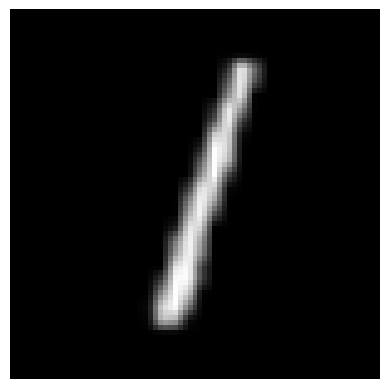

Predicted: 1 Actual: 1




TestCase 3


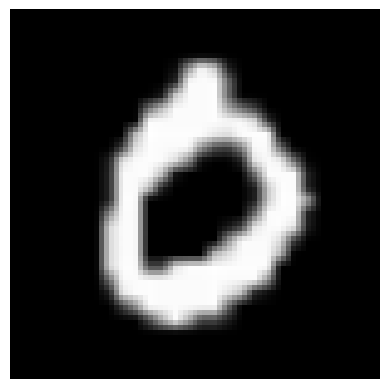

Predicted: 0 Actual: 0




TestCase 4


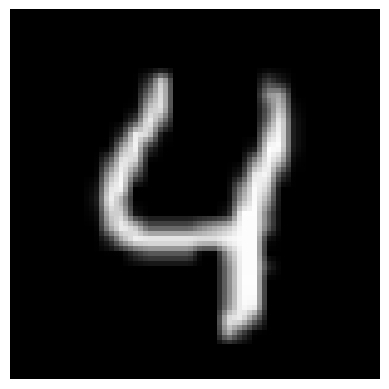

Predicted: 4 Actual: 4




TestCase 5


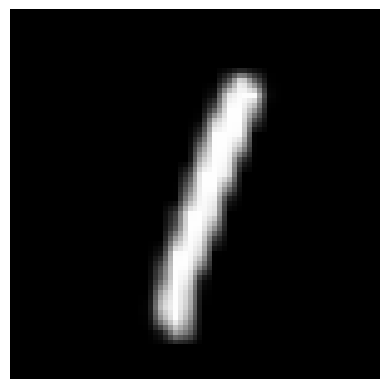

Predicted: 1 Actual: 1




TestCase 6


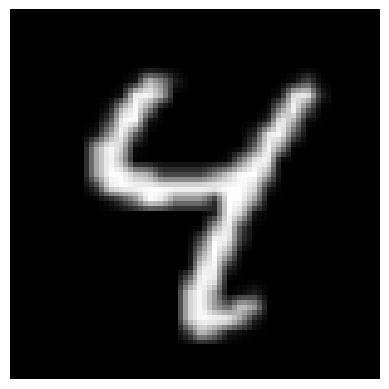

Predicted: 4 Actual: 4




TestCase 7


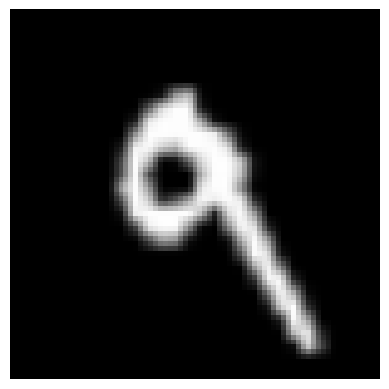

Predicted: 9 Actual: 9




TestCase 8


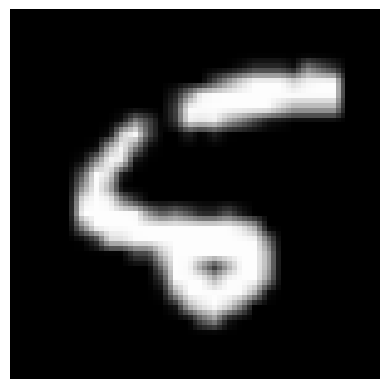

Predicted: 5 Actual: 5




TestCase 9


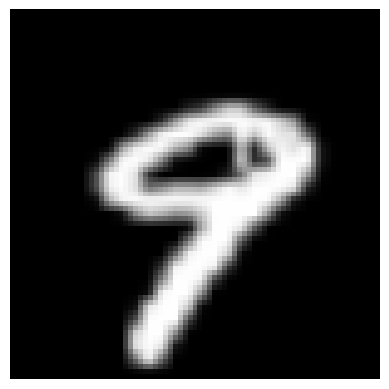

Predicted: 9 Actual: 9






In [40]:
for i in range(10):
    print(f'TestCase {i}')
    plt.imshow(x_test[i])
    plt.axis('off')
    plt.title(f"Predicted: {predicted_labels[i]}, Actual: {np.argmax(y_test[i])}")
    plt.show()
    print('\n\n\n')